<a href="https://colab.research.google.com/github/AgastyaPatel/cits4012-group/blob/main/CITS4012_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter


nltk.download("punkt")
nltk.download("wordnet")
nltk.download("all")
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data..

Sample rows:
                                             premise  \
0  Pluto rotates once on its axis every 6.39 Eart...   
1  ---Glenn =====================================...   
2  geysers - periodic gush of hot water at the su...   
3  Facts: Liquid water droplets can be changed in...   
4  By comparison, the earth rotates on its axis o...   

                                          hypothesis    label  
0   Earth rotates on its axis once times in one day.  neutral  
1   Earth rotates on its axis once times in one day.  entails  
2  The surface of the sun is much hotter than alm...  neutral  
3  Evaporation is responsible for changing liquid...  entails  
4   Earth rotates on its axis once times in one day.  entails  

Missing values:
premise       0
hypothesis    0
label         0
dtype: int64

Removed 20 duplicate rows.

Tokenised example:
                                      premise_tokens  \
0  [pluto, rotates, once, on, it, axis, every, 63...   

                           

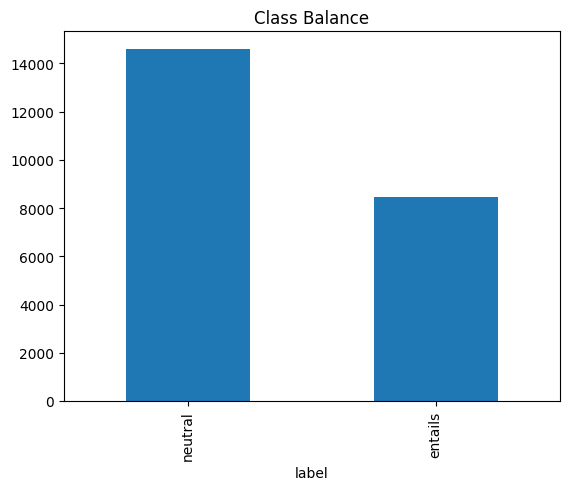

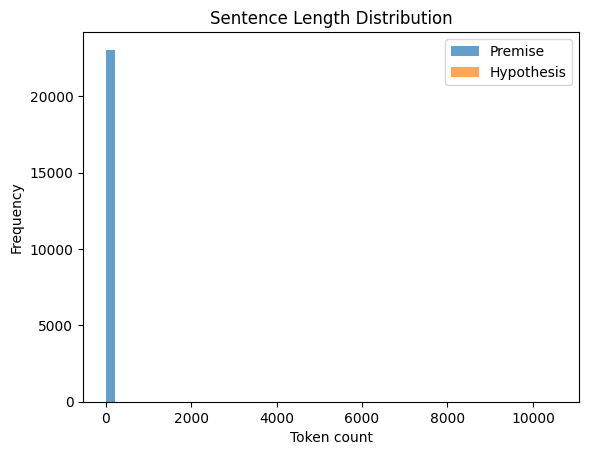

In [ ]:
# --- Step 1: Load dataset ---
with open("train_formatted.json", "r") as f:
    data = json.load(f)

# If it's a list of dicts with premise/hypothesis/label
df = pd.DataFrame(data)

print("Sample rows:")
print(df.head())

# --- Step 2: Handle missing data ---
print("\nMissing values:")
print(df.isnull().sum())
df = df.dropna()

# --- Step 3: Remove duplicates ---
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"\nRemoved {before - after} duplicate rows.")

# --- Step 4: Normalisation ---
def normalize_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["premise"] = df["premise"].apply(normalize_text)
df["hypothesis"] = df["hypothesis"].apply(normalize_text)

# --- Step 5: Tokenisation + Lemmatization ---
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text, language='english') # Added language='english'
    lemmas = [lemmatizer.lemmatize(tok) for tok in tokens]
    return lemmas

df["premise_tokens"] = df["premise"].apply(tokenize_and_lemmatize)
df["hypothesis_tokens"] = df["hypothesis"].apply(tokenize_and_lemmatize)

print("\nTokenised example:")
print(df[["premise_tokens", "hypothesis_tokens"]].head(1))

# --- Step 6: Class balance ---
label_counts = df["label"].value_counts()
print("\nClass distribution:")
print(label_counts)

label_counts.plot(kind="bar", title="Class Balance")
plt.show()

# --- Step 7: Sentence length distribution ---
premise_lens = df["premise_tokens"].apply(len)
hypothesis_lens = df["hypothesis_tokens"].apply(len)

plt.hist(premise_lens, bins=50, alpha=0.7, label="Premise")
plt.hist(hypothesis_lens, bins=50, alpha=0.7, label="Hypothesis")
plt.legend()
plt.title("Sentence Length Distribution")
plt.xlabel("Token count")
plt.ylabel("Frequency")
plt.show()